In [7]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    roc_auc_score,
    classification_report
)


In [8]:
# load and prepare data
# Load your dataset
data = pd.read_csv("creditcard.csv")

# Separate features and target
X = data.drop("Class", axis=1)
y = data["Class"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
#trainlogistic regression
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]


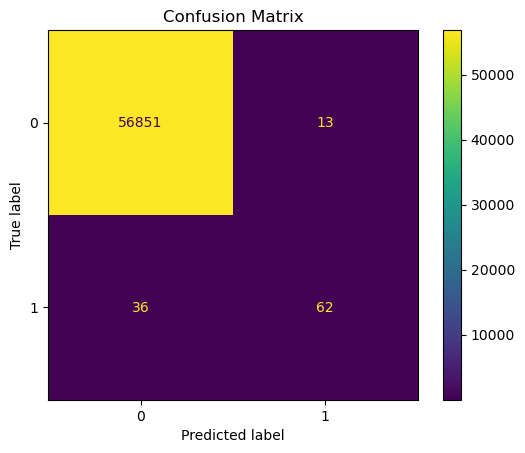

In [10]:
#confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


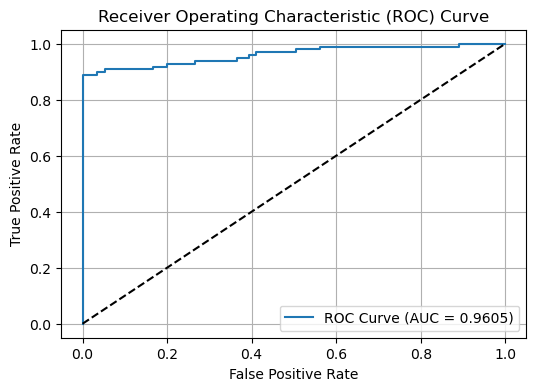

AUC Score: 0.9605


In [11]:
# ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC Score: {roc_auc:.4f}")


In [13]:
from sklearn.pipeline import make_pipeline

# Combine scaling + model in a pipeline
pipeline = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs'))

# Perform cross-validation with AUC as scoring metric
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')

print("Cross-Validation AUC Scores:", cv_scores)
print("Mean CV AUC:", np.mean(cv_scores))


Cross-Validation AUC Scores: [0.99312169 0.96964457 0.96415552 0.95361318 0.97259597]
Mean CV AUC: 0.9706261853937596
